# Logistische Regression
In diesem Notebook behandeln wir die logistische Regression, mit welcher wir die Stornierungen vorhersagen.
Actually: ... mit welcher wir die Wahrscheinlichkeit vorhersagen, mit welcher ein Filmdatensatz (k)eine Altersbewertung enthält.

## Load Packages

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
import scipy.stats
import scipy.special
import sklearn.linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from pygam import LinearGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
import feature_engine.imputation as imp
from feature_engine.encoding import OneHotEncoder

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

## Load Data

In [2]:
X_train = pd.read_csv('Xtrain_tvshows_featured.csv')
X_test = pd.read_csv('Xtest_tvshows_featured.csv')
y_train = pd.read_csv('ytrain_tvshows.csv')
y_test = pd.read_csv('ytest_tvshows.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (1074, 7)
Shape of X Test: (4294, 7)
Shape of y Train: (4294, 1)
Shape of y Test: (1074, 1)


## Beschreibung abrufen

In [3]:
X_train.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,0.092896,0.674462,0.446804,0.378026,0.306331,0.330540,0.063315
std,0.104831,0.148417,0.235990,0.485120,0.461184,0.470627,0.243642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034483,0.602564,0.313253,0.000000,0.000000,0.000000,0.000000
50%,0.057471,0.705128,0.457831,0.000000,0.000000,0.000000,0.000000
75%,0.114943,0.782051,0.614458,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X_train.head()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0.068966,0.641026,0.000000,0,0,1,0
1,0.022989,0.884615,0.626506,1,0,0,0
2,0.045977,0.615385,0.036145,0,0,1,0
3,0.068966,0.884615,0.000000,0,1,0,0
4,0.034483,0.692308,0.626506,1,0,0,0


## Selecting Feature (Tutorial: https://www.datacamp.com/tutorial/understanding-logistic-regression-python) unsicher obs stimmt... --> checce nöd wie die Target variable definiert wird ( label??) Also - where's unsere Age_na Column? :-/ --> Das wäre die Target Variable?

NameError: name 'sns' is not defined

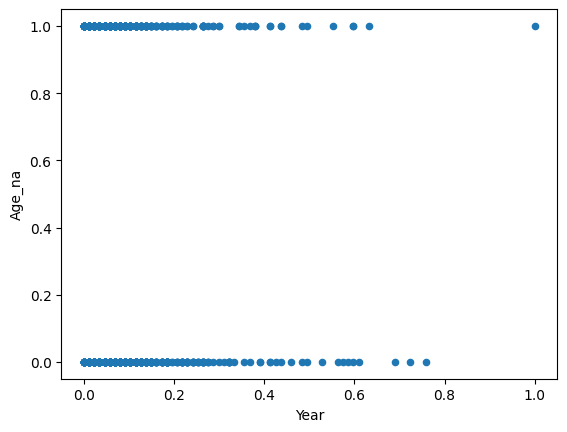

In [8]:
#split dataset in features and target variable
#feature_cols = ['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+']
#X = X_train[feature_cols] # Features
#y = y_train # Target variable

tabelle = X_train[['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+']]
tabelle = tabelle.join(y_train)
tabelle.head()
tabelle.plot.scatter('Year', 'Age_na')
sns.despine()

In [9]:
#ke ahnig wasmer hie mache
logreg = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
logreg.fit(tabelle['Year', 'IMDb', 'Rotten_Tomatoes', 'Netflix','Hulu','Prime Video','Disney+'].values.reshape(-1,1), tabelle['Age_na'])
print(logreg.intercept_, logreg.coef_)

NameError: name 'sklearn' is not defined

## Model Development and Prediction (noch keine Ahnung ab hier) - eingefügt vom oben verlinkten Tutorial

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [1074, 4294]

## Logistic Regression from Statistics Packages - ab hier wieder Inhalte von Yves Staudt, nix dran gemacht.

In [7]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

ValueError: The indices for endog and exog are not aligned

## Logistic Regression with Scikit Learn

In [6]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)

C:\Users\staudtyves\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\staudtyves\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

## Prediction

Vorhersage der Gruppe.<

In [7]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

Vorhersage der Wahrscheinlichkeit

In [8]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.694082  , 0.305918  ],
       [0.61431701, 0.38568299],
       [0.00985962, 0.99014038],
       ...,
       [0.82889301, 0.17110699],
       [0.73095083, 0.26904917],
       [0.76529315, 0.23470685]])

## Model Evaluation

### Confusion Matrix

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20153  2218]
 [ 5017  8429]]


### Accuracy Score

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.7980009492698997

### Precision and Recall

In [11]:
metrics.precision_score(y_test,y_pred)

0.7916784070630224

In [12]:
metrics.recall_score(y_test,y_pred)

0.6268778818979622

### F1-Score

In [13]:
metrics.f1_score(y_test, y_pred)

0.6997053085958577

### Area Under the Curve

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.7638658329073199